# APRENDIZAJE PROFUNDO PARA LA DETECCIÓN DE CAÍDAS EN PERSONAS VULNERABLES

## María Paula Saa Beltrán

### 1. Importar librerías

In [2]:
import cv2                              # Librería de visión artificial
import numpy as np                      # Librería para cálculo numérico
import os                               # Módulo para trabajar con so
from matplotlib import pyplot as plt    # Librería de visualización de datos
import time                             # Función de temporizador
import mediapipe as mp                  # Modelos de ML para detección

### 2. Determinar puntos de referencia con MediaPipe Holistic

#### Variables

In [3]:
mp_holistic = mp.solutions.holistic        # Modelo Holistic
mp_drawing = mp.solutions.drawing_utils    # Utilidades de dibujo para los puntos de referencia

#### Función 1: Detección de imagen

In [4]:
def mediapipe_detection(image, model):             
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convertir imagen de BGR a RGB
    image.flags.writeable = False                  # Imagen no apta para uso
    results = model.process(image)                 # Predicción
    image.flags.writeable = True                   # Imagen apta para uso
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Convertir imagen de RGB a BGR
    return image, results

#### Función 2: Dibujar puntos de referencia

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)       # Conexiones de todo el cuerpo

#### Función 3: Dibujar punto de referencia con colores

In [6]:
def draw_styled_landmarks(image, results): # Hacer las línes con colores determinados
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,                    # Dibujar conexiones de todo el cuerpo
                              mp_drawing.DrawingSpec(color=(51, 40, 28), thickness = 4, circle_radius = 4),
                              mp_drawing.DrawingSpec(color=(176, 201, 72), thickness = 4, circle_radius = 2)) 

#### Toma de vídeo y detección de puntos de referencia

In [23]:
cap = cv2.VideoCapture(2)
# Acceso al modelo Holistic  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lectura de vídeo
        ret, frame = cap.read()
        # Predicciones
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Dibujo de los puntos de referencia
        draw_styled_landmarks(image, results)
        # Visualización en la pantalla
        cv2.imshow('OpenCV Feed', image)
        # Cierre de la ventana
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to tar

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

#### Prueba de tom de resultados 

In [24]:
draw_landmarks(frame, results)

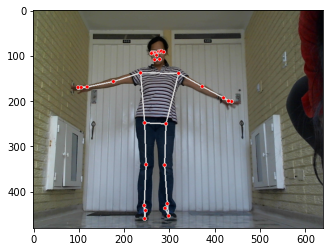

In [25]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### 3. Extracción de los valores de los puntos de referencia

#### Convertir datos de los resultados en arreglos de tipo Numpy

In [13]:
results.pose_landmarks

landmark {
  x: 0.7916133999824524
  y: 0.3767717182636261
  z: -0.937447726726532
  visibility: 0.9993642568588257
}
landmark {
  x: 0.8256250619888306
  y: 0.31200721859931946
  z: -0.8433346748352051
  visibility: 0.998604416847229
}
landmark {
  x: 0.8452053070068359
  y: 0.31505391001701355
  z: -0.8431729078292847
  visibility: 0.9979318976402283
}
landmark {
  x: 0.862806499004364
  y: 0.3191085159778595
  z: -0.8433589935302734
  visibility: 0.9980044364929199
}
landmark {
  x: 0.7705927491188049
  y: 0.30766937136650085
  z: -0.8613471984863281
  visibility: 0.9991793632507324
}
landmark {
  x: 0.7504321932792664
  y: 0.3065853416919708
  z: -0.8609485626220703
  visibility: 0.999255895614624
}
landmark {
  x: 0.7303141355514526
  y: 0.3056691884994507
  z: -0.8617264032363892
  visibility: 0.9995894432067871
}
landmark {
  x: 0.8738829493522644
  y: 0.3602043688297272
  z: -0.31415584683418274
  visibility: 0.9973013401031494
}
landmark {
  x: 0.6859172582626343
  y: 0.330895

#### Concatenar datos y extraer los datos

#### Función 4: Extraer puntos de referencia

In [14]:
def extract_keypoints(results):
    # Son 3 valores (x, y, z) y 4 para pose (visivility) - res.x, res.y, res.z, res.visibility -> Cada uno es un valor individual de cada punto de referencia
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # Concatenar todos los puntos
    return np.concatenate([pose])

#### Prueba puntos guardados en .npy

In [15]:
result_test = extract_keypoints(results)
result_test

array([ 7.91613400e-01,  3.76771718e-01, -9.37447727e-01,  9.99364257e-01,
        8.25625062e-01,  3.12007219e-01, -8.43334675e-01,  9.98604417e-01,
        8.45205307e-01,  3.15053910e-01, -8.43172908e-01,  9.97931898e-01,
        8.62806499e-01,  3.19108516e-01, -8.43358994e-01,  9.98004436e-01,
        7.70592749e-01,  3.07669371e-01, -8.61347198e-01,  9.99179363e-01,
        7.50432193e-01,  3.06585342e-01, -8.60948563e-01,  9.99255896e-01,
        7.30314136e-01,  3.05669188e-01, -8.61726403e-01,  9.99589443e-01,
        8.73882949e-01,  3.60204369e-01, -3.14155847e-01,  9.97301340e-01,
        6.85917258e-01,  3.30895454e-01, -3.79054487e-01,  9.99698997e-01,
        8.11761379e-01,  4.56602633e-01, -7.52434075e-01,  9.98958468e-01,
        7.48953164e-01,  4.49415594e-01, -7.72540927e-01,  9.99625981e-01,
        9.28079426e-01,  7.13461041e-01,  1.08031994e-02,  9.86809254e-01,
        4.99686241e-01,  6.40195966e-01, -2.95014381e-01,  9.99401987e-01,
        1.13121819e+00,  

In [16]:
np.save('prueba', result_test)
np.load('prueba.npy')

array([ 7.91613400e-01,  3.76771718e-01, -9.37447727e-01,  9.99364257e-01,
        8.25625062e-01,  3.12007219e-01, -8.43334675e-01,  9.98604417e-01,
        8.45205307e-01,  3.15053910e-01, -8.43172908e-01,  9.97931898e-01,
        8.62806499e-01,  3.19108516e-01, -8.43358994e-01,  9.98004436e-01,
        7.70592749e-01,  3.07669371e-01, -8.61347198e-01,  9.99179363e-01,
        7.50432193e-01,  3.06585342e-01, -8.60948563e-01,  9.99255896e-01,
        7.30314136e-01,  3.05669188e-01, -8.61726403e-01,  9.99589443e-01,
        8.73882949e-01,  3.60204369e-01, -3.14155847e-01,  9.97301340e-01,
        6.85917258e-01,  3.30895454e-01, -3.79054487e-01,  9.99698997e-01,
        8.11761379e-01,  4.56602633e-01, -7.52434075e-01,  9.98958468e-01,
        7.48953164e-01,  4.49415594e-01, -7.72540927e-01,  9.99625981e-01,
        9.28079426e-01,  7.13461041e-01,  1.08031994e-02,  9.86809254e-01,
        4.99686241e-01,  6.40195966e-01, -2.95014381e-01,  9.99401987e-01,
        1.13121819e+00,  

### 4. Creación de las carpetas para la recolección de datos

#### Determinar parámetros y valores

In [36]:
# Ruta para los datos
DATA_PATH = os.path.join('DATOS_MEDIAPIPE_PRUEBA_201122_final_7') # Se crea una carpeta con las 2 acciones a detectar y se generan los 80 vídeos
# Acciones que se van a detectar
actions = np.array(['NO CAIDA', 'CAIDA',])
# 50 vídeos para cada valor de datos
no_sequences = 50
# Cada vídeo va a contener una duración de 50 frames
sequence_length = 50

#### Creación de cada folder para cada acción con sus respectivos frames y cantidad de vídeos

In [37]:
# Un folder por acción
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Recolección de valores de referencia para entrenamiento y evaluación

In [38]:
cap = cv2.VideoCapture(2)
# Acceso al modelo Holistic 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Primer bucle
    # Bucle para las acciones
    for action in actions: # Bucle para todas las acciones
        for sequence in range(no_sequences): # Bucle para las secuencias de los vídeos
            for frame_num in range(sequence_length): # Bucle para la secuencia de duración de los vídeos
                
                # Leer vídeo
                ret, frame = cap.read()
                # Predicciones 
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                # Dibujo de puntos de referencia
                draw_styled_landmarks(image, results)
                # Lógica de espera para tomar los vídeos
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120, 200),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15, 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                # Exportar puntos de referencia
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                # Cierre de la ventana
                if cv2.waitKey(10) & 0xFF ==ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to tar

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [29]:
cap.release()
cv2.destroyAllWindows()

### 6. Procesamiento de los datos y creación de etiquetas

#### Importar librerías para el modelo

In [39]:
from sklearn.model_selection import train_test_split # Training partition and test partition
from tensorflow.keras.utils import to_categorical # Convert data into line

2022-11-20 16:46:43.006994: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-20 16:46:43.009690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: no se puede abrir el archivo del objeto compartido: No existe el archivo o el directorio; LD_LIBRARY_PATH: /home/mariapaulasaabeltran/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-20 16:46:43.009699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Determinar las etiquetas

In [40]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'NO CAIDA': 0, 'CAIDA': 1}

#### Creación de arreglo con los 1662 puntos de referencia

In [41]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

#### Número de etiquetas, secuencias y puntos de referencia

In [42]:
np.array(sequences).shape

(100, 50, 132)

In [43]:
np.array(labels).shape

(100,)

In [44]:
X = np.array(sequences)
X.shape

(100, 50, 132)

In [45]:
y = to_categorical(labels).astype(int)
y.shape

(100, 2)

#### División de datos (entrenamiento y evaluación)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_test.shape

(20, 50, 132)

In [48]:
X.shape[2]

132

In [49]:
X_train.shape

(80, 50, 132)

In [50]:
y_test.shape

(20, 2)

In [51]:
y_train.shape

(80, 2)

### 7. Elaboración y entrenamiento de la Red Neuronal LSTM

#### Importar librerías para redes neuronales

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

#### Creación de Callback Logs para visualización

In [12]:
log_dir = os.path.join('Logs_LSTM_3__')
tb_callback = TensorBoard(log_dir=log_dir)

#### Creación de la Red Neuronal LSTM

In [53]:
model  = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(actions.shape[0], activation="sigmoid"))

2022-11-20 16:47:18.611309: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: no se puede abrir el archivo del objeto compartido: No existe el archivo o el directorio; LD_LIBRARY_PATH: /home/mariapaulasaabeltran/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-20 16:47:18.611329: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 16:47:18.611341: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mpsaab): /proc/driver/nvidia/version does not exist
2022-11-20 16:47:18.611493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow wi

In [54]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, epochs=16, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/16
3/3 [==============================] - 5s 496ms/step - loss: 0.6917 - accuracy: 0.5125 - val_loss: 0.6941 - val_accuracy: 0.4500
Epoch 2/16
3/3 [==============================] - 0s 75ms/step - loss: 0.6855 - accuracy: 0.5375 - val_loss: 0.6638 - val_accuracy: 0.7000
Epoch 3/16
3/3 [==============================] - 0s 74ms/step - loss: 0.6534 - accuracy: 0.7750 - val_loss: 0.6141 - val_accuracy: 1.0000
Epoch 4/16
3/3 [==============================] - 0s 74ms/step - loss: 0.6071 - accuracy: 0.9750 - val_loss: 0.5658 - val_accuracy: 1.0000
Epoch 5/16
3/3 [==============================] - 0s 73ms/step - loss: 0.5450 - accuracy: 1.0000 - val_loss: 0.5076 - val_accuracy: 1.0000
Epoch 6/16
3/3 [==============================] - 0s 74ms/step - loss: 0.4883 - accuracy: 1.0000 - val_loss: 0.4382 - val_accuracy: 1.0000
Epoch 7/16
3/3 [==============================] - 0s 77ms/step - loss: 0.4159 - accuracy: 1.0000 - val_loss: 0.5159 - val_accuracy: 0.8500
Epoch 8/16
3/3 [==========

#### Resumen del modelo

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            50432     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 64)            49408     
                                                                 
 dropout_2 (Dropout)         (None, 50, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                1

### 8. Predicciones

In [57]:
res = model.predict(X_test)

1/1 [==============================] - 1s 914ms/step


In [58]:
actions[np.argmax(res[0])]

'NO CAIDA'

In [59]:
actions[np.argmax(y_test[0])]

'NO CAIDA'

### 9. Almacenamiento de los pesos

In [60]:
model.save('modelo_tesis_mpsaab_final_201122_mami.h5')

### 10. Matriz de confusión, gráficas y reporte de clasificación

In [61]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix

In [62]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 20ms/step


In [63]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [64]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[39,  0],
        [ 0, 41]],

       [[41,  0],
        [ 0, 39]]])

In [65]:
cf_matrix = confusion_matrix(ytrue, yhat)

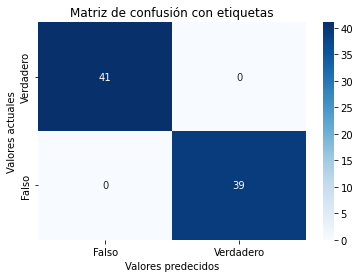

In [86]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Matriz de confusión con etiquetas');
ax.set_xlabel('Valores predecidos')
ax.set_ylabel('Valores actuales');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Falso','Verdadero'])
ax.yaxis.set_ticklabels(['Verdadero','Falso'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [67]:
accuracy_score(ytrue, yhat)

1.0

In [68]:
from sklearn.metrics import classification_report
print(classification_report(ytrue, yhat, target_names=label_map))

              precision    recall  f1-score   support

    NO CAIDA       1.00      1.00      1.00        41
       CAIDA       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [69]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [70]:
model.metrics_names

['loss', 'accuracy']

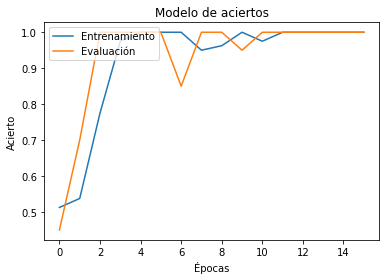

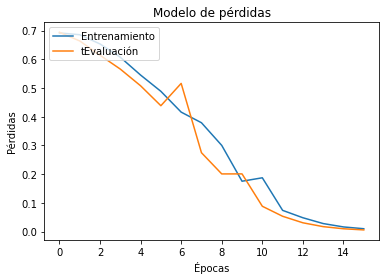

In [81]:
# Gráficas de modelo de acierto y pérdidas
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de aciertos')
plt.ylabel('Acierto')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Evaluación'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de pérdidas')
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'tEvaluación'], loc='upper left')
plt.show()

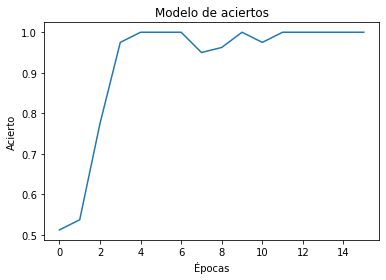

In [82]:
plt.plot(history.history['accuracy'])
plt.title('Modelo de aciertos')
plt.ylabel('Acierto')
plt.xlabel('Épocas')
plt.show()

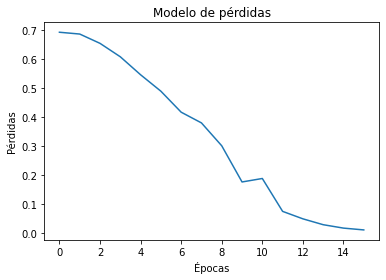

In [83]:
# "Loss"
plt.plot(history.history['loss'])
plt.title('Modelo de pérdidas')
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.show()

### 11. Prueba en tiempo real

In [74]:
colors = [(0, 255, 97), (255, 76, 255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2, cv2.LINE_AA)
    
    return output_frame

In [75]:
actions[0]

'NO CAIDA'

In [76]:
from keras.models import load_model
model = load_model('modelo_tesis_mpsaab_final_201122_mami.h5')

In [77]:
# New detection variables
sequence = [] # concatenate a data on a sequence
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(2)
# Access an holistic model - mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections 
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw Landmawks
        draw_styled_landmarks(image, results)
        # 2. Prediction logic 
        keypoints = extract_keypoints(results)
        #sequence.insert(0, keypoints)
        sequence.append(keypoints)
        sequence = sequence[-50:]

        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

        # 3. Visualization logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]: # current actions was not equal to the last
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                if len(sentence) > 5:
                    sentence = sentence[-5:]
            
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (169, 204, 227), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (231, 76, 60), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow("OpenCV Feed", image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to target thread (0x561bdeeff6e0)

QObject::moveToThread: Current thread (0x561bdeeff6e0) is not the object's thread (0x561bdf1172f0).
Cannot move to tar

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [73]:
import keras as kr
print(kr.__version__)

2.9.0
